<a href="https://colab.research.google.com/github/AAhmadS/Document-and-Token-Classification/blob/main/Document%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Natural Language Processing-Homework4**

####**Students' names** :
>Amirahmad Shafiee<br/>
>Ali Shafiee<br/>
>Neda Fallah<br/>


####**Notebook author**: Amirahmad Shafiee

In [ ]:
!pip install -qU transformers
!pip install -qU torchtext
!pip install -qU fasttext

In [ ]:
!git clone https://github.com/facebookresearch/fastText.git

fatal: destination path 'fastText' already exists and is not an empty directory.


In [ ]:
# import fasttext.util

In [ ]:
# !sudo pip install fastText/.
# !cd fastText
# fasttext.util.download_model('fa', if_exists='ignore')
# ft = fasttext.load_model('cc.fa.300.bin')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/nlp_hw4

/content/drive/MyDrive/nlp_hw4


##Essential packages

In [ ]:
import pandas as pd
import numpy as np
from numpy import pad
import json
import matplotlib.pyplot as plt
plt.switch_backend('agg')
%matplotlib inline
import matplotlib.ticker as ticker
from collections import Counter
from __future__ import unicode_literals, print_function, division
import random
from tqdm import tqdm
from sklearn.utils import resample
from joblib import Parallel, delayed
from sklearn import metrics
from sklearn.model_selection import train_test_split as tts
import sklearn.svm as svm
from sklearn.model_selection import StratifiedKFold as skf
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score as acs
import plotly.express as px
from sklearn.metrics import roc_curve, auc,precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.utils.fixes import loguniform
from sklearn.metrics import f1_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report
import seaborn as sns
import fasttext.util

import itertools
import torch
from torch import nn
import torchtext
from torchtext.vocab import Vocab
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader, Dataset, TensorDataset
from torchtext.data.utils import get_tokenizer
import torch.nn.functional as F
from torch import optim

import nltk, re
from nltk import word_tokenize, sent_tokenize, WhitespaceTokenizer, FreqDist, pos_tag
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist


from transformers import pipeline, AutoTokenizer


import plotly.express as px
import plotly.graph_objects as go

from tqdm.notebook import tqdm

import os

import copy
import collections
import torch

##Load data and analysis


In [ ]:
# with open('food.jsonl', 'r') as json_file:
#     json_list = list(json_file)

# data_food = pd.DataFrame([])
# for json_str in json_list:
#     result = json.loads(json_str)
#     data_food = data_food.append(result,ignore_index=True)

# for i in range(data.shape[0]):
#   data_food["sentiment"][i] = int(data["sentiment"][i])+2

In [ ]:
data = pd.read_csv('Cleaned_sentipers.csv')
data.drop(columns ={"Unnamed: 0","index","sid","file"},inplace=True)

In [ ]:
data.isna().value_counts()

text   polarity  Cleaned_sentipers
False  False     False                15683
dtype: int64

In [ ]:
data.polarity.value_counts()

 0    5938
 1    5019
 2    2940
-1    1574
-2     212
Name: polarity, dtype: int64

In [ ]:
for i in range(data.shape[0]):
  data["polarity"][i] = int(data["polarity"][i])+2

<ipython-input-12-2996538be869>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["polarity"][i] = int(data["polarity"][i])+2


In [ ]:
data.sample(10)

,text,polarity,Cleaned_sentipers
824,جمع بندی به هر حال، به نظر می‌رسد تجربه تولید...,2,جمع بندی به هر حال به نظر می‌رسد تجربه تولید ا...
2900,مودهای عکاسی خیلی متنوع هستند.,4,مودهای عکاسی خیلی متنوع هستند
3132,بنابراين به نقد تبلت هاي بزرگ تر مي پردازيم.,2,بنابراین به نقد تبلت های بزرگ تر می پردازیم
6642,عاليه\nديجي کالا کارت حرف نداره,4,عالیه\nدیجی کالا کارت حرف نداره
9236,با توجه به قيمتش فوق‌العادست.,3,با توجه به قیمتش فوق‌العادست
10065,تاچش يه کم هنگ ميکنه.,1,تاچش یه کم هنگ میکنه
14853,خيلي گوشي خوش دست و سبکي و واقعا باهاش راحتم.,4,خیلی گوشی خوش دست و سبکی و واقعا باهاش راحتم
15343,همانطور که گفتیم، هرچند در این پرینتر نقاط ضع...,3,همانطور که گفتیم هرچند در این پرینتر نقاط ضعفی...
15450,این پرینتر به شما اجازه ی استفاده از کارت حافظ...,3,این پرینتر به شما اجازه ی استفاده از کارت حافظ...
2276,نرم افزار از لحاظ نرم افزاری، HTC One X Plus ...,2,نرم افزار از لحاظ نرم افزاری htc one x plus به...


In [ ]:
data["words_count"] = [len(x.split()) for x in data["Cleaned_sentipers"]]

##Essential plots

In [ ]:
class distributions:

  def minmax(data, col_end = 'words_count', col_beg = 'Cleaned_sentipers'):
    data[col_end] = data[col_beg].apply(lambda t: len(t.split()))

    summary = data[col_end].min(), data[col_end].max(), data[col_end].mean(), np.std(data[col_end])
    print(f" max: {summary[1]} \n min :{summary[0]}\n mean : {summary[2]}\n std : {summary[3]}")

  def word_freq(data, col_end = "words_count"):

      fig = go.Figure()

      fig.add_trace(go.Histogram(
          x=data[col_end]
      ))

      fig.update_layout(
          title_text='Distribution of word counts within data',
          xaxis_title_text='Word Count',
          yaxis_title_text='Frequency',
          bargap=0.2,
          bargroupgap=0.2)

      fig.show()

  def data_gl_than(data, less_than=50.0, greater_than=5.0, col='words_count'):
      data_length = data[col].values

      data_glt = sum([1 for length in data_length if greater_than < length <= less_than])

      data_glt_rate = (data_glt / len(data_length)) * 100

      print(f'sentences with word length of greater than {greater_than} and less than {less_than} includes {data_glt_rate:.2f}% of the whole!')

  def full_df_run(data, col_begin = 'words_count', minmax = True, freq = True, gl = True):
    if minmax :
      distributions.minmax(data)
    if freq:
      distributions.word_freq(data,col_end=col_begin)
    if gl:
      distributions.data_gl_than(data,col=col_begin)

  def word_and_freq(data, col = "tokenized"):
    tokenized_sent = data[col].values
    total_len = 0
    for i in range(len(tokenized_sent)):
      total_len += len(tokenized_sent[i])

    mp_freqdist = FreqDist(itertools.chain(*tokenized_sent))
    top20words=mp_freqdist.most_common(20)
    print ('%-16s' % 'word', '%-16s' % 'Frequency','%-16s' %  '% of the total')
    for topword in top20words:
        percent=(topword[1]/total_len)*100
        print ('%-16s' % topword[0], '%-16s' % topword[1],'%-16s' %  percent)

  def author_count(data, col_auth):
    fig = go.Figure()

    groupby_rate = data.groupby(col_auth)[col_auth].count()

    fig.add_trace(go.Bar(
        x=list(sorted(groupby_rate.index)),
        y=groupby_rate.tolist(),
        text=groupby_rate.tolist(),
        textposition='auto'
    ))

    fig.update_layout(
        title_text='Distribution of sentiments within sentences',
        xaxis_title_text='sentiment',
        yaxis_title_text='Frequency',
        bargap=0.2,
        bargroupgap=0.2)

    fig.show()

In [ ]:
distributions.full_df_run(data)

 max: 338 
 min :1
 mean : 21.287381240834023
 std : 18.1482516158326


sentences with word length of greater than 5.0 and less than 50.0 includes 86.55% of the whole!


##Document classification

###SVM linear kernel

####Tf-Idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
corpus = [text for text in data["Cleaned_sentipers"]]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(X)

  (0, 12120)	0.24912174301954468
  (0, 9303)	0.26115032545296346
  (0, 6725)	0.12309791900379546
  (0, 1411)	0.3055410591788662
  (0, 12060)	0.2353503713582755
  (0, 8725)	0.3308027388777241
  (0, 11373)	0.33968246056149715
  (0, 3033)	0.0926333373649946
  (0, 6699)	0.2647348357991808
  (0, 11371)	0.276615572922344
  (0, 6201)	0.33414805524663116
  (0, 8518)	0.2839804196229064
  (0, 3877)	0.365437490671731
  (1, 8810)	0.3282800055784346
  (1, 7319)	0.26489877533750567
  (1, 12485)	0.19420220274416541
  (1, 1595)	0.4402910943363796
  (1, 1168)	0.4402910943363796
  (1, 6802)	0.26623896471950836
  (1, 11829)	0.3391350016470136
  (1, 11647)	0.2406343950222826
  (1, 11375)	0.3779790455466682
  (1, 3033)	0.0998252427516575
  (2, 6193)	0.17462266032449633
  (2, 6053)	0.14911770386373085
  :	:
  (15682, 5570)	0.17874753429329693
  (15682, 5001)	0.31116322992126794
  (15682, 8708)	0.308311209204561
  (15682, 4660)	0.18054301750622267
  (15682, 3315)	0.20573994582020372
  (15682, 5841)	0.1834584

In [ ]:
##related to scaling and splitting

y = data['polarity']
x = X
# x=MinMaxScaler().fit_transform(x)
x_train , x_test , y_train , y_test = tts(x,y,test_size = 0.1 , random_state = 42)

In [ ]:
parameters = dict(kernel=['linear'],C = [5e-3,1e-2,5e-2,1e-1,5e-1,1])

####Preprocess data<br/>implement the cross validation function

####Train and evaluation section

In [ ]:
random_model = svm.SVC(max_iter=1000,probability=True,verbose=False)
Gmodel = GridSearchCV(estimator=random_model,param_grid=parameters,n_jobs=-1,cv=5,scoring='accuracy',refit=True)

In [ ]:
Gmodel.fit(x_train,y_train)
model = Gmodel.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



In [ ]:
print(f'score of model with score set to accuracy :{Gmodel.best_score_}\nparameters of model with score set to accuracy:{Gmodel.best_params_}\n-------')

score of model with score set to accuracy :0.6128674979972398
parameters of model with score set to accuracy:{'C': 1, 'kernel': 'linear'}
-------


In [ ]:
model.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': 1000,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
# def roc_curve(model,title,score,x,y):
#   y_score = model.predict_proba(x)[:, 1]
#   fpr, tpr, thresholds = metrics.roc_curve(y, y_score)

#   fig = px.area(
#       x=fpr, y=tpr,
#       title=f'{title}\'s ROC Curve (AUC={auc(fpr, tpr):.4f})  -- score:{score}',
#       labels=dict(x='False Positive Rate', y='True Positive Rate'),
#       width=700, height=500
#   )
#   fig.add_shape(
#       type='line', line=dict(dash='dash'),
#       x0=0, x1=1, y0=0, y1=1
#   )

#   fig.update_yaxes(scaleanchor="x", scaleratio=1)
#   fig.update_xaxes(constrain='domain')
#   fig.show()

# roc_curve(modelAcc,"Model_acc","accuracy",x_train,y_train)
# roc_curve(modelF1,"Model_f1","f1",x_train,y_train)
# roc_curve(modelRac,"Model_rac","roc_auc",x_train,y_)

# plt.legend()
# plt.show()

In [ ]:
# def prec_recall(model,title,score,x,y):

#   y_score = model.predict_proba(x)[:, 1]
#   precision, recall, thresholds = precision_recall_curve(y, y_score)

#   fig = px.area(
#       x=recall, y=precision,
#       title=f'{title}\'s Precision-Recall Curve (AUC={auc(precision, recall):.4f}) -- score : {score}',
#       labels=dict(x='Recall', y='Precision'),
#       width=700, height=500
#   )
#   fig.add_shape(
#       type='line', line=dict(dash='dash'),
#       x0=0, x1=1, y0=1, y1=0
#   )
#   fig.update_yaxes(scaleanchor="x", scaleratio=1)
#   fig.update_xaxes(constrain='domain')

#   fig.show()


# prec_recall(modelAcc,"Model_acc","accuracy",x_train,y_train)
# prec_recall(modelF1,"Model_f1","f1",x_train,y_train)
# prec_recall(modelRac,"Model_rac","roc_auc",x_train,y_train)

# plt.legend()
# plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScal

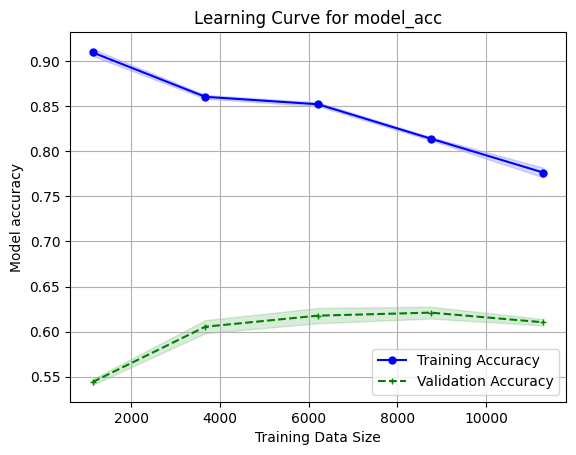

In [ ]:
def learning_curve_(model,x,y,fold,title):
  train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=x, y=y,cv=fold,)
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
  plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
  plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
  plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
  plt.title(f'Learning Curve for {title}')
  plt.xlabel('Training Data Size')
  plt.ylabel('Model accuracy')
  plt.grid()
  plt.legend(loc='lower right')
  plt.show()


learning_curve_(model,x_train,y_train,5,"model_acc")

####Test

In [ ]:
predicted_classes = model.predict(x_test)
metrics.confusion_matrix(y_test,predicted_classes)

array([[  1,   8,   5,   4,   4],
       [  1,  74,  45,  36,   4],
       [  0,  44, 402, 136,  17],
       [  1,  25, 141, 274,  61],
       [  0,   5,  32,  60, 189]])

In [ ]:
y_test, y_pred = y_test, predicted_classes

print(f'F1: {f1_score(y_test, y_pred, average="weighted")}')
print("--------------classification_report---------------")
print(classification_report(y_test, y_pred, target_names= ["Furious","Angry","Neutral","Happy","Delighted"]))

F1: 0.5957280864386794
--------------classification_report---------------
              precision    recall  f1-score   support

     Furious       0.33      0.05      0.08        22
       Angry       0.47      0.46      0.47       160
     Neutral       0.64      0.67      0.66       599
       Happy       0.54      0.55      0.54       502
   Delighted       0.69      0.66      0.67       286

    accuracy                           0.60      1569
   macro avg       0.54      0.48      0.48      1569
weighted avg       0.60      0.60      0.60      1569



###Transformer-based model

####Preprocess

In [ ]:
##set word_tokenizer, sent tokenizer, normalizer, lemmatizer and other tooks to suitable and favoured persian ones
!pip install -q hazm

In [ ]:
import hazm
word_tokenizer = hazm.WordTokenizer()
normalizer = hazm.Normalizer()
sent_tokenizer = hazm.SentenceTokenizer()
lemmatizer = hazm.Lemmatizer()

#####Subsection 1: tokenizing

In [ ]:
tokenized_sents = [word_tokenizer.tokenize(sent) for sent in data["Cleaned_sentipers"]]
data["tokenized"] = tokenized_sents
data.sample(5)

,text,polarity,Cleaned_sentipers,words_count,tokenized
12743,مودهای عکاسی دوربین که از طریق پیچ تنظیم قسمت ...,3,مودهای عکاسی دوربین که از طریق پیچ تنظیم قسمت ...,28,"[مودهای, عکاسی, دوربین, که, از, طریق, پیچ, تنظ..."
9822,همانطور که گفتیم این دوربین مجهز به همراه کیت ...,3,همانطور که گفتیم این دوربین مجهز به همراه کیت ...,17,"[همانطور, که, گفتیم, این, دوربین, مجهز, به, هم..."
13769,من مهر پارسال اين گوشي رو خريدم و اون موقع کلي...,2,من مهر پارسال این گوشی رو خریدم و اون موقع کلی...,27,"[من, مهر, پارسال, این, گوشی, رو, خریدم, و, اون..."
12477,حرف نداره با توجه به اينکه دوربينش فلش نداره و...,3,حرف نداره با توجه به اینکه دوربینش فلش نداره و...,13,"[حرف, نداره, با, توجه, به, اینکه, دوربینش, فلش..."
6279,از ويژگياش هم اينکه قطعات يدکي و تونرش همه جا ...,3,از ویژگیاش هم اینکه قطعات یدکی و تونرش همه جا ...,18,"[از, ویژگیاش, هم, اینکه, قطعات, یدکی, و, تونرش..."


In [ ]:
distributions.word_and_freq(data,"tokenized")

word             Frequency        % of the total  
و                11550            3.436385220270805
به               8497             2.5280489365057166
که               8334             2.479552764133064
این              7744             2.304014471495854
از               7182             2.1368068096956643
در               7110             2.115385187543327
با               5552             1.651845085969135
گوشی             3777             1.1237425954080373
را               3312             0.9853946190075242
است              2962             0.8812617335447727
دوربین           2805             0.8345506963514813
هم               2782             0.827707678163929
های              2222             0.6610950614235264
آن               2089             0.6215245649476807
یک               2067             0.614979069290022
برای             2052             0.6105162313416184
من               2004             0.5962351499067267
می               1986             0.5908797443686423
رو

**In the next subsection** we will check again after normalising our data, actions like:
>omitting stopwords<br/>
>punctuations removal

#####Subsection 2: normalising

In [ ]:
stop_words = ["برای","در","را","رو","اند","بود","است","هم","آن","بوده","این","پیش","بعد","همراه","به","ز","تا","اگر","پی","پس","بی","با","یا","که","از","و"]

In [ ]:
import string

def clean_text(text):
    #removing roman numbers
    pattern = r"\b(?=[MDCLXVIΙ])M{0,4}(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})([IΙ]X|[IΙ]V|V?[IΙ]{0,3})\b\.?"
    re.sub(pattern, '&', text)
    #removing numbers
    text_nonum = re.sub(r'\d+', '', text)
    #getting rid of punctuations
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in string.punctuation])
    #getting rid of white spaces
    text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()

    return text_no_doublespace

def normalize_sentence(tokenized_sents, minimum_length=1, stopword_removal=True, number_removal = True):

    normalized_sents = tokenized_sents
    if stopword_removal:
        normalized_sents=[[word for word in sentence if (word not in stop_words)] for sentence in normalized_sents ]

    if minimum_length>1:
        normalized_sents= [[word for word in sentence if len(word)>minimum_length] for sentence in normalized_sents ]

    return normalized_sents

In [ ]:
clean_token = [word_tokenizer.tokenize(clean_text(txt)) for txt in data["Cleaned_sentipers"]]
data["clean_token"] = clean_token
normalized_sents = normalize_sentence(clean_token,)
data["normalized_sents"] = normalized_sents

In [ ]:
data.sample(5)

,text,polarity,Cleaned_sentipers,words_count,tokenized,clean_token,normalized_sents
11882,تنها عيبش صفحه‌نمايششه که يک کم کيفيتش پايينه ...,1,تنها عیبش صفحه‌نمایششه که یک کم کیفیتش پایینه ...,14,"[تنها, عیبش, صفحه‌نمایششه, که, یک, کم, کیفیتش,...","[تنها, عیبش, صفحه‌نمایششه, که, یک, کم, کیفیتش,...","[تنها, عیبش, صفحه‌نمایششه, یک, کم, کیفیتش, پای..."
7762,هيچ تلوزيوني مثل پلاسما نميشه.,3,هیچ تلوزیونی مثل پلاسما نمیشه,5,"[هیچ, تلوزیونی, مثل, پلاسما, نمیشه]","[هیچ, تلوزیونی, مثل, پلاسما, نمیشه]","[هیچ, تلوزیونی, مثل, پلاسما, نمیشه]"
13333,بايد بگم عاليه بي نظير واقعا معرکه است,4,باید بگم عالیه بی نظیر واقعا معرکه است,8,"[باید, بگم, عالیه, بی, نظیر, واقعا, معرکه, است]","[باید, بگم, عالیه, بی, نظیر, واقعا, معرکه, است]","[باید, بگم, عالیه, نظیر, واقعا, معرکه]"
2295,جمع بندی در نهایت می‌توان گفت که HTC One X Plu...,3,جمع بندی در نهایت می‌توان گفت که htc one x plu...,18,"[جمع, بندی, در, نهایت, می‌توان, گفت, که, htc, ...","[جمع, بندی, در, نهایت, می‌توان, گفت, که, htc, ...","[جمع, بندی, نهایت, می‌توان, گفت, htc, one, x, ..."
11224,شايد نسبت به مدل پيشين خود از نظر سخت افزاري و...,1,شاید نسبت به مدل پیشین خود از نظر سخت افزاری و...,46,"[شاید, نسبت, به, مدل, پیشین, خود, از, نظر, سخت...","[شاید, نسبت, به, مدل, پیشین, خود, از, نظر, سخت...","[شاید, نسبت, مدل, پیشین, خود, نظر, سخت, افزاری..."


In [ ]:
distributions.word_and_freq(data,"normalized_sents")

word             Frequency        % of the total  
گوشی             3776             1.527866570635505
دوربین           2808             1.1361889116378439
های              2222             0.899078262699177
یک               2068             0.8367659078586399
من               2004             0.8108698642885467
می               1986             0.803586602034458
خیلی             1817             0.7352048619821803
بسیار            1630             0.659539859675814
کیفیت            1563             0.6324299390633724
نیز              1477             0.5976321305160596
صفحه             1432             0.5794239748808377
بر               1374             0.5559556853954406
ولی              1360             0.5502909258644828
نظر              1299             0.5256087593367376
روی              1186             0.4798860574082916
تبلت             1183             0.4786721803659435
دارد             1132             0.4580362706460253
استفاده          1085             0.4390188636492381

In [ ]:
data["words_norm_count"] = [len(sen) for sen in data["normalized_sents"]]
distributions.data_gl_than(data,col = "words_norm_count")

sentences with word length of greater than 5.0 and less than 50.0 includes 84.44% of the whole!


#####Subsection 3: Frequency analysis

In [ ]:
distributions.full_df_run(data, minmax=False,col_begin="words_norm_count")
distributions.author_count(data, "polarity")

sentences with word length of greater than 5.0 and less than 50.0 includes 84.44% of the whole!


In [ ]:
name_list = ["Furious","Angry","Neutral","Happy","Delighted"]
labels= [name_list[int(i)] for i in data['polarity']]
data["label"] = labels
for name in name_list:
  df = data[data["label"]==name]
  print(f"\nword frequency within {name}'s polarity is as follows:\n")
  distributions.word_and_freq(df,"normalized_sents")


word frequency within Furious's polarity is as follows:

word             Frequency        % of the total  
خیلی             65               1.5647568608570053
گوشی             52               1.2518054886856043
من               45               1.0832932113625422
کیفیت            38               0.91478093403948
بسیار            36               0.8666345690900338
نیست             33               0.7944150216658643
می               33               0.7944150216658643
های              28               0.6740491092922485
دوربین           28               0.6740491092922485
ولی              26               0.6259027443428021
پایین            25               0.601829561868079
صفحه             25               0.601829561868079
داره             25               0.601829561868079
هست              24               0.5777563793933558
تبلت             24               0.5777563793933558
نظر              24               0.5777563793933558
اما              23               0.553683196918

#####Subsection 5: lemmatization

In [ ]:
lem_sents = []
for nsent in data["normalized_sents"]:
  tokens = []
  for token in nsent:
    tokens.append(lemmatizer.lemmatize(token))
  lem_sents.append(tokens)
data["lemmatized"] = lem_sents
# data["lemmatized"] = data["normalized_sents"]

In [ ]:
data.sample(5)

,text,polarity,Cleaned_sentipers,words_count,tokenized,clean_token,normalized_sents,words_norm_count,label,lemmatized
14598,سلام دوستان من اين تبلتو يک هفته اي هست که از ...,4,سلام دوستان من این تبلتو یک هفته ای هست که از ...,36,"[سلام, دوستان, من, این, تبلتو, یک, هفته, ای, ه...","[سلام, دوستان, من, این, تبلتو, یک, هفته, ای, ه...","[سلام, دوستان, من, تبلتو, یک, هفته, ای, هست, د...",27,Delighted,"[سلام, دوستان, من, تبلتو, یک, هفته, ای, هست, د..."
12450,کيفيت مکالمه و صفحه نمايش بسيار بالا - سرعت ع...,4,کیفیت مکالمه و صفحه نمایش بسیار بالا - سرعت عا...,89,"[کیفیت, مکالمه, و, صفحه, نمایش, بسیار, بالا, -...","[کیفیت, مکالمه, و, صفحه, نمایش, بسیار, بالا, س...","[کیفیت, مکالمه, صفحه, نمایش, بسیار, بالا, سرعت...",65,Delighted,"[کیفیت, مکالمه, صفحه, نمایش, بسیار, بالا, سرعت..."
7322,به نظر من بهترين گوشيه لمسيه ..,3,به نظر من بهترین گوشیه لمسیه,6,"[به, نظر, من, بهترین, گوشیه, لمسیه]","[به, نظر, من, بهترین, گوشیه, لمسیه]","[نظر, من, بهترین, گوشیه, لمسیه]",5,Happy,"[نظر, من, بهترین, گوشیه, لمسیه]"
15638,یک دکمه ی Select در زیر نمایشگر وجود دارد که ب...,2,یک دکمه ی select در زیر نمایشگر وجود دارد که ب...,25,"[یک, دکمه, ی, select, در, زیر, نمایشگر, وجود, ...","[یک, دکمه, ی, select, در, زیر, نمایشگر, وجود, ...","[یک, دکمه, ی, select, زیر, نمایشگر, وجود, دارد...",21,Neutral,"[یک, دکمه, #هست, select, زیر, نمایشگر, وجود, د..."
8882,این دوربین فیلم برداری، با طراحی به رنگ های م...,2,این دوربین فیلم برداری با طراحی به رنگ های مشک...,13,"[این, دوربین, فیلم, برداری, با, طراحی, به, رنگ...","[این, دوربین, فیلم, برداری, با, طراحی, به, رنگ...","[دوربین, فیلم, برداری, طراحی, رنگ, های, مشکیخا...",8,Neutral,"[دوربین, فیلم, بردار, طراح, رنگ, های, مشکیخاکس..."


In [ ]:
from transformers import BertConfig, BertTokenizer
from transformers import BertModel

from transformers import get_linear_schedule_with_warmup

import torch
import torch.nn as nn
import torch.nn.functional as F
import os

In [ ]:
train, test = tts(data, test_size=0.1, random_state=1, stratify=data['polarity'])
train, valid = tts(train, test_size=0.1, random_state=1, stratify=train['polarity'])

train = train.reset_index(drop=True)
valid = valid.reset_index(drop=True)
test = test.reset_index(drop=True)

x_train, y_train = train['lemmatized'].values.tolist(), train['polarity'].values.tolist()
x_valid, y_valid = valid['lemmatized'].values.tolist(), valid['polarity'].values.tolist()
x_test, y_test = test['lemmatized'].values.tolist(), test['polarity'].values.tolist()

print(train.shape)
print(valid.shape)
print(test.shape)

(12702, 10)
(1412, 10)
(1569, 10)


#### Configuration

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f'device: {device}')

train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

device: cuda:0
CUDA is available!  Training on GPU ...


In [ ]:
MAX_LEN = 128
TRAIN_BATCH_SIZE = 32
VALID_BATCH_SIZE = 32
TEST_BATCH_SIZE = 32

EPOCHS = 5
EEVERY_EPOCH = 397
LEARNING_RATE = 2e-5
CLIP = 0.0

MODEL_NAME_OR_PATH = 'HooshvareLab/bert-fa-base-uncased'
OUTPUT_PATH = '/sentiment_classification_bert/pytorch_model.bin'

os.makedirs(os.path.dirname(OUTPUT_PATH), exist_ok=True)

In [ ]:
# create a key finder based on label 2 id and id to label
label2id = {label: i for i, label in enumerate(name_list)}
id2label = {v: k for k, v in label2id.items()}

print(f'label2id: {label2id}')
print(f'id2label: {id2label}')

label2id: {'Furious': 0, 'Angry': 1, 'Neutral': 2, 'Happy': 3, 'Delighted': 4}
id2label: {0: 'Furious', 1: 'Angry', 2: 'Neutral', 3: 'Happy', 4: 'Delighted'}


In [ ]:
# setup the tokenizer and configuration

tokenizer = BertTokenizer.from_pretrained(MODEL_NAME_OR_PATH)
config = BertConfig.from_pretrained(
    MODEL_NAME_OR_PATH, **{
        'label2id': label2id,
        'id2label': id2label,
    })

print(config.to_json_string())

{
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "Furious",
    "1": "Angry",
    "2": "Neutral",
    "3": "Happy",
    "4": "Delighted"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "Angry": 1,
    "Delighted": 4,
    "Furious": 0,
    "Happy": 3,
    "Neutral": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.31.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 100000
}



#### Input Embeddings

In [ ]:
idx = np.random.randint(0, len(train))
sample_rev = train.iloc[idx]['lemmatized']
sample_sent = train.iloc[idx]['polarity']

print(f'Sample: \n{" ".join(sample_rev)}\n{sample_sent}')

Sample: 
کل گوشیه خوبیه خرید پشیمون نمیشین
3


In [ ]:
tokens = train.iloc[idx]["lemmatized"]
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f'  sentence: {" ".join(sample_rev)}')
print(f'  Coded_tokens: {tokens}')
print(f'   Tokens: {tokenizer.convert_tokens_to_string(tokens)}')
print(f'Token IDs: {token_ids}')

  sentence: کل گوشیه خوبیه خرید پشیمون نمیشین
  Coded_tokens: ['کل', 'گوشیه', 'خوبیه', 'خرید', 'پشیمون', 'نمیشین']
   Tokens: کل گوشیه خوبیه خرید پشیمون نمیشین
Token IDs: [3142, 1, 44342, 3535, 1, 1]


In [ ]:
encoding = tokenizer.encode_plus(
    sample_rev,
    max_length=MAX_LEN,
    truncation=True,
    add_special_tokens=True, # Add '[CLS]' and '[SEP]'
    return_token_type_ids=True,
    return_attention_mask=True,
    padding='max_length',
    return_tensors='pt',  # Return PyTorch tensors
)

print(f'Keys: {encoding.keys()}\n')
for k in encoding.keys():
    print(f'{k}:\n{encoding[k]}')

Keys: dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

input_ids:
tensor([[    2,  3142,     1, 44342,  3535,     1,     1,     4,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,  

#### Dataset

In [ ]:
class SentDataset(torch.utils.data.Dataset):

    def __init__(self, tokenizer, sent, targets=None, label_list=None, max_len=MAX_LEN):
        self.sent = sent
        self.targets = targets
        self.has_target = isinstance(targets, list) or isinstance(targets, np.ndarray)

        self.tokenizer = tokenizer
        self.max_len = max_len


        self.label_map = {label: i for i, label in enumerate(label_list)} if isinstance(label_list, list) else {}

    def __len__(self):
        return len(self.sent)

    def __getitem__(self, item):
        sentence = str(self.sent[item])

        if self.has_target:
            target = self.targets[item]

        encoding = self.tokenizer.encode_plus(
            sentence,
            add_special_tokens=True,
            truncation=True,
            max_length=self.max_len,
            return_token_type_ids=True,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt')

        inputs = {
            'sentence': sentence,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'token_type_ids': encoding['token_type_ids'].flatten(),
        }

        if self.has_target:
            inputs['targets'] = torch.tensor(target, dtype=torch.long)

        return inputs


def create_data_loader(x, y, tokenizer, max_len, batch_size, label_list):
    dataset = SentDataset(
        sent=x,
        targets=y,
        tokenizer=tokenizer,
        max_len=max_len,
        label_list=label_list)

    return torch.utils.data.DataLoader(dataset, batch_size=batch_size)

In [ ]:
label_list = name_list
train_data_loader = create_data_loader(train['lemmatized'].to_numpy(), train['polarity'].to_numpy(dtype=int), tokenizer, MAX_LEN, TRAIN_BATCH_SIZE, label_list)
valid_data_loader = create_data_loader(valid['lemmatized'].to_numpy(), valid['polarity'].to_numpy(dtype=int), tokenizer, MAX_LEN, VALID_BATCH_SIZE, label_list)
test_data_loader = create_data_loader(test['lemmatized'].to_numpy(), test["polarity"].to_numpy(dtype=int), tokenizer, MAX_LEN, TEST_BATCH_SIZE, label_list)

In [ ]:
sample_data = next(iter(train_data_loader))

print(sample_data.keys())

print(sample_data['sentence'])
print(sample_data['input_ids'].shape)
print(sample_data['input_ids'][0, :])
print(sample_data['attention_mask'].shape)
print(sample_data['attention_mask'][0, :])
print(sample_data['token_type_ids'].shape)
print(sample_data['token_type_ids'][0, :])
print(sample_data['targets'].shape)
print(sample_data['targets'])

dict_keys(['sentence', 'input_ids', 'attention_mask', 'token_type_ids', 'targets'])
["['فقط', 'باید', 'بگم', 'عالیه', 'نقاش', 'گرفته', 'کارا', 'مهندس', 'طراح']", "['برام', 'عجیبه', 'یه', 'جمله', '#هست', 'اشتباه', 'درمورد', 'اپل', 'جا', 'افتاده', 'اینه', 'اپل', 'تو', 'ایران', 'کارا', 'باید', 'نداره']", "['البته', 'نرم\\u200cافزار', 'امکانات', 'jvc', 'کار', 'کرد#کن', 'مشکل', 'برنخواهید', 'خورد#خور']", "['ناگفته', 'نمونه', 'اینکه', 'ساکن', 'تهران', 'نیستم', 'برام', 'هزینه', '#هست', 'پست', 'اعمال', 'میشه', 'همیشه', 'دیجی', 'کالا', 'خرید', 'میکنم', 'چند', 'دلیل', 'همه', 'مه', 'کالا', 'اصل', 'درجه', 'یک', 'تحویل', 'میده', 'بسته', 'بند', 'عالیه', 'ساعت', 'مهلت', 'تست', 'داره', 'اینکه', 'بیش', 'قلم', 'کالا', 'جمله', 'لب', 'تاب', 'هارد', 'دوربین']", "['پرینتر', 'شما', 'اجازه', '#هست', 'استفاده', 'کارت', 'حافظه', 'پرینت', 'مستقیم', 'روی', 'نمایش', 'عکس', 'ها', 'بر', 'روی', 'نمایشگر', 'رنگید#رنگ', 'اینچ', 'می', 'داد#ده']", "['صفحه', '#هست', 'لمس', 'بزرگ', 'xr', 'رزولوشن', 'بالاست', 'کارا', 'خوبی'

In [ ]:
sample_test = next(iter(test_data_loader))
print(sample_test.keys())

dict_keys(['sentence', 'input_ids', 'attention_mask', 'token_type_ids', 'targets'])


In [ ]:
class ClassifierModel(nn.Module):

    def __init__(self, config,output_size):
        super(ClassifierModel, self).__init__()

        self.bert = BertModel.from_pretrained(MODEL_NAME_OR_PATH)
        self.dropout = nn.Dropout(p=0.5)
        self.classifier = nn.Linear(config.hidden_size,output_size)

    def forward(self, input_ids, attention_mask, token_type_ids):
        pooled_output = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids)['pooler_output']

        pooled_output = self.dropout(pooled_output)
        logits = self.classifier(pooled_output)
        return logits

In [ ]:
import torch, gc

gc.collect()
torch.cuda.empty_cache()
pt_model = None

In [ ]:
# pt_model = ClassifierModel(config=config,output_size=5)
# pt_model = pt_model.to(device)

from transformers import AutoModelForSequenceClassification

pt_model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME_OR_PATH, num_labels=5).to(device)

print('pt_model', type(pt_model))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


pt_model <class 'transformers.models.bert.modeling_bert.BertForSequenceClassification'>


In [ ]:
for name,param in pt_model.named_parameters():
    print(name)

bert.embeddings.word_embeddings.weight
bert.embeddings.position_embeddings.weight
bert.embeddings.token_type_embeddings.weight
bert.embeddings.LayerNorm.weight
bert.embeddings.LayerNorm.bias
bert.encoder.layer.0.attention.self.query.weight
bert.encoder.layer.0.attention.self.query.bias
bert.encoder.layer.0.attention.self.key.weight
bert.encoder.layer.0.attention.self.key.bias
bert.encoder.layer.0.attention.self.value.weight
bert.encoder.layer.0.attention.self.value.bias
bert.encoder.layer.0.attention.output.dense.weight
bert.encoder.layer.0.attention.output.dense.bias
bert.encoder.layer.0.attention.output.LayerNorm.weight
bert.encoder.layer.0.attention.output.LayerNorm.bias
bert.encoder.layer.0.intermediate.dense.weight
bert.encoder.layer.0.intermediate.dense.bias
bert.encoder.layer.0.output.dense.weight
bert.encoder.layer.0.output.dense.bias
bert.encoder.layer.0.output.LayerNorm.weight
bert.encoder.layer.0.output.LayerNorm.bias
bert.encoder.layer.1.attention.self.query.weight
bert.enc

#### Training

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

import plotly.express as px
import plotly.graph_objects as go

from tqdm.notebook import tqdm

import os

import copy
import collections
import torch

In [ ]:
def simple_accuracy(y_true, y_pred):
    return (y_true == y_pred).mean()

def acc_and_f1(y_true, y_pred, average='weighted'):
    acc = simple_accuracy(y_true, y_pred)
    f1 = f1_score(y_true=y_true, y_pred=y_pred, average=average)
    return {
        "acc": acc,
        "f1": f1,
    }

def y_loss(y_true, y_pred, losses):
    y_true = torch.stack(y_true).cpu().detach().numpy()
    y_pred = torch.stack(y_pred).cpu().detach().numpy()
    y = [y_true, y_pred]
    loss = np.mean(losses)

    return y, loss


def eval_op(model, data_loader, loss_fn):
    model.eval()

    losses = []
    y_pred = []
    y_true = []

    with torch.no_grad():
        for dl in tqdm(data_loader, total=len(data_loader), desc="Evaluation... "):

            input_ids = dl['input_ids']
            attention_mask = dl['attention_mask']
            token_type_ids = dl['token_type_ids']
            targets = dl['targets']

            # move tensors to GPU if CUDA is available
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            token_type_ids = token_type_ids.to(device)
            targets = targets.to(device)

            # compute predicted outputs by passing inputs to the model
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                token_type_ids=token_type_ids)["logits"]

            # convert output probabilities to predicted class
            _, preds = torch.max(outputs, dim=1)

            # calculate the batch loss
            loss = loss_fn(outputs, targets)

            # accumulate all the losses
            losses.append(loss.item())

            y_pred.extend(preds)
            y_true.extend(targets)

    eval_y, eval_loss = y_loss(y_true, y_pred, losses)
    return eval_y, eval_loss


def train_op(model,
             data_loader,
             loss_fn,
             optimizer,
             scheduler,
             step=0,
             print_every_step=397,
             eval=False,
             eval_cb=None,
             eval_loss_min=np.Inf,
             eval_data_loader=None,
             clip=0.0):

    model.train()

    losses = []
    y_pred = []
    y_true = []

    for dl in tqdm(data_loader, total=len(data_loader), desc="Training... "):
        step += 1

        input_ids = dl['input_ids']
        attention_mask = dl['attention_mask']
        token_type_ids = dl['token_type_ids']
        targets = dl['targets']

        # move tensors to GPU if CUDA is available
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        token_type_ids = token_type_ids.to(device)
        targets = targets.to(device)

        # clear the gradients of all optimized variables
        optimizer.zero_grad()

        # compute predicted outputs by passing inputs to the model
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids)["logits"]

        # convert output probabilities to predicted class
        # print(outputs)
        _, preds = torch.max(outputs, dim=1)

        # calculate the batch loss
        loss = loss_fn(outputs, targets)

        # accumulate all the losses
        losses.append(loss.item())

        # compute gradient of the loss with respect to model parameters
        loss.backward()

        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        if clip > 0.0:
            nn.utils.clip_grad_norm_(model.parameters(), max_norm=clip)

        # perform optimization step
        optimizer.step()

        # perform scheduler step
        scheduler.step()

        y_pred.extend(preds)
        y_true.extend(targets)

        if eval:
            train_y, train_loss = y_loss(y_true, y_pred, losses)
            train_score = acc_and_f1(train_y[0], train_y[1], average='weighted')

            if step % print_every_step == 0:
                eval_y, eval_loss = eval_op(model, eval_data_loader, loss_fn)
                eval_score = acc_and_f1(eval_y[0], eval_y[1], average='weighted')

                if hasattr(eval_cb, '__call__'):
                    eval_loss_min = eval_cb(model, step, train_score, train_loss, eval_score, eval_loss, eval_loss_min)

    train_y, train_loss = y_loss(y_true, y_pred, losses)

    return train_y, train_loss, step, eval_loss_min

def eval_callback(epoch, epochs, output_path):
    def eval_cb(model, step, train_score, train_loss, eval_score, eval_loss, eval_loss_min):
        statement = ''
        statement += 'Epoch: {}/{}...'.format(epoch, epochs)
        statement += 'Step: {}...'.format(step)

        statement += 'Train Loss: {:.6f}...'.format(train_loss)
        statement += 'Train Acc: {:.3f}...'.format(train_score['acc'])
        statement += 'Train F1: {:.3f}...'.format(train_score['f1'])

        statement += 'Valid Loss: {:.6f}...'.format(eval_loss)
        statement += 'Valid Acc: {:.3f}...'.format(eval_score['acc'])
        statement += 'Valid F1: {:.3f}...'.format(eval_score['f1'])

        print(statement)

        if eval_loss <= eval_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                eval_loss_min,
                eval_loss))

            torch.save(model.state_dict(), output_path)
            eval_loss_min = eval_loss

        return eval_loss_min


    return eval_cb

In [ ]:
from torch import optim
from transformers import AdamW

optimizer = optim.AdamW(pt_model.parameters(), lr=LEARNING_RATE)
total_steps = len(train_data_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)
summed = sum([len(train['polarity'] == i) for i in range(5)])
weight = torch.tensor([len(train['polarity'] == i) for i in range(5)]).to(device) / summed
loss_fn = nn.CrossEntropyLoss(weight=weight)

step = 0
eval_loss_min = np.Inf
history = collections.defaultdict(list)


for epoch in tqdm(range(1, EPOCHS + 1), desc="Epochs... "):
    train_y, train_loss, step, eval_loss_min = train_op(
        model=pt_model,
        data_loader=train_data_loader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        scheduler=scheduler,
        step=step,
        print_every_step=EEVERY_EPOCH,
        eval=True,
        eval_cb=eval_callback(epoch, EPOCHS, OUTPUT_PATH),
        eval_loss_min=eval_loss_min,
        eval_data_loader=valid_data_loader,
        clip=CLIP)

    train_score = acc_and_f1(train_y[0], train_y[1], average='weighted')

    eval_y, eval_loss = eval_op(
        model=pt_model,
        data_loader=valid_data_loader,
        loss_fn=loss_fn)

    eval_score = acc_and_f1(eval_y[0], eval_y[1], average='weighted')

    history['train_acc'].append(train_score['acc'])
    history['train_loss'].append(train_loss)
    history['train_f1'].append(train_score['f1'])
    history['val_acc'].append(eval_score['acc'])
    history['val_loss'].append(eval_loss)
    history['val_f1'].append(eval_score['f1'])

Epochs... :   0%|          | 0/5 [00:00<?, ?it/s]

Training... :   0%|          | 0/397 [00:00<?, ?it/s]

Evaluation... :   0%|          | 0/45 [00:00<?, ?it/s]

Epoch: 1/5...Step: 397...Train Loss: 1.038609...Train Acc: 0.561...Train F1: 0.547...Valid Loss: 0.845703...Valid Acc: 0.657...Valid F1: 0.656...
Validation loss decreased (inf --> 0.845703).  Saving model ...


Evaluation... :   0%|          | 0/45 [00:00<?, ?it/s]

Training... :   0%|          | 0/397 [00:00<?, ?it/s]

Evaluation... :   0%|          | 0/45 [00:00<?, ?it/s]

Epoch: 2/5...Step: 794...Train Loss: 0.756677...Train Acc: 0.701...Train F1: 0.696...Valid Loss: 0.784820...Valid Acc: 0.691...Valid F1: 0.689...
Validation loss decreased (0.845703 --> 0.784820).  Saving model ...


Evaluation... :   0%|          | 0/45 [00:00<?, ?it/s]

Training... :   0%|          | 0/397 [00:00<?, ?it/s]

Evaluation... :   0%|          | 0/45 [00:00<?, ?it/s]

Epoch: 3/5...Step: 1191...Train Loss: 0.600928...Train Acc: 0.768...Train F1: 0.765...Valid Loss: 0.789898...Valid Acc: 0.703...Valid F1: 0.703...


Evaluation... :   0%|          | 0/45 [00:00<?, ?it/s]

Training... :   0%|          | 0/397 [00:00<?, ?it/s]

Evaluation... :   0%|          | 0/45 [00:00<?, ?it/s]

Epoch: 4/5...Step: 1588...Train Loss: 0.467696...Train Acc: 0.824...Train F1: 0.822...Valid Loss: 0.796577...Valid Acc: 0.712...Valid F1: 0.713...


Evaluation... :   0%|          | 0/45 [00:00<?, ?it/s]

Training... :   0%|          | 0/397 [00:00<?, ?it/s]

Evaluation... :   0%|          | 0/45 [00:00<?, ?it/s]

Epoch: 5/5...Step: 1985...Train Loss: 0.376580...Train Acc: 0.863...Train F1: 0.861...Valid Loss: 0.846491...Valid Acc: 0.715...Valid F1: 0.714...


Evaluation... :   0%|          | 0/45 [00:00<?, ?it/s]

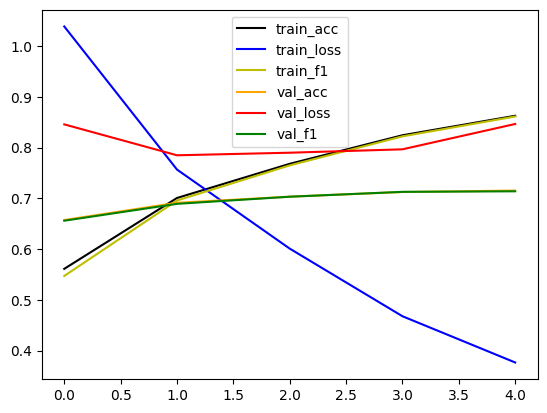

In [ ]:
keyset = ['train_acc','train_loss','train_f1','val_acc','val_loss','val_f1']
colors = ['black','blue','y','orange','red','g']
for i in range(len(keyset)):
  x = history[keyset[i]]
  plt.plot(x,colors[i],label = keyset[i])

plt.legend()
plt.show()

#### Prediction

In [ ]:
def predict(model, comments, tokenizer, max_len=MAX_LEN, batch_size=16):
    data_loader = create_data_loader(comments, None, tokenizer, max_len, batch_size, None)

    predictions = []
    prediction_probs = []


    model.eval()
    with torch.no_grad():
        for dl in tqdm(data_loader, position=0):
            input_ids = dl['input_ids']
            attention_mask = dl['attention_mask']
            token_type_ids = dl['token_type_ids']

            # move tensors to GPU if CUDA is available
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            token_type_ids = token_type_ids.to(device)

            # compute predicted outputs by passing inputs to the model
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                token_type_ids=token_type_ids)["logits"]

            # convert output probabilities to predicted class
            _, preds = torch.max(outputs, dim=1)

            predictions.extend(preds)
            prediction_probs.extend(F.softmax(outputs, dim=1))

    predictions = torch.stack(predictions).cpu().detach().numpy()
    prediction_probs = torch.stack(prediction_probs).cpu().detach().numpy()

    return predictions, prediction_probs

In [ ]:
# model = ClassifierModel(config=config,output_size=5)
# model = model.to(device)
# model = AutoModelForSequenceClassification.from_pretrained(OUTPUT_PATH, num_labels=5).to(device)

# model.load_state_dict(torch.load(OUTPUT_PATH))
model = pt_model
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(100000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12

In [ ]:
test_sents = test['lemmatized'].to_numpy()

preds, probs = predict(model, test_sents, tokenizer, max_len=128)

print(preds.shape, probs.shape)

  0%|          | 0/99 [00:00<?, ?it/s]

(1569,) (1569, 5)


In [ ]:
print(f"predictions : {preds}\n with accuracy : {(preds == test.polarity.to_numpy(dtype=int)).mean()}")

predictions : [2 4 2 ... 2 3 1]
 with accuracy : 0.7029955385595921


In [ ]:
preds_label = [id2label[t] for t in preds]
preds_label[0:5]

['Neutral', 'Delighted', 'Neutral', 'Happy', 'Happy']

####F1 Score and report

In [ ]:
y_test, y_pred = test['polarity'].values.astype(int), preds

print(f'F1: {f1_score(y_test, y_pred, average="weighted")}')
print("--------------classification_report---------------")
print(classification_report(y_test, y_pred, target_names=label_list))

F1: 0.700058085234883
--------------classification_report---------------
              precision    recall  f1-score   support

     Furious       0.33      0.10      0.15        21
       Angry       0.59      0.61      0.60       158
     Neutral       0.77      0.76      0.76       594
       Happy       0.67      0.65      0.66       502
   Delighted       0.70      0.78      0.74       294

    accuracy                           0.70      1569
   macro avg       0.61      0.58      0.58      1569
weighted avg       0.70      0.70      0.70      1569



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[  2,  11,   2,   6,   0],
       [  3,  96,  42,  17,   0],
       [  1,  38, 450,  91,  14],
       [  0,  15,  76, 325,  86],
       [  0,   2,  14,  48, 230]])

####SHAP and HuggingFace

In [ ]:
!pip install huggingface_hub

# !huggingface-cli login

# !huggingface-cli repo create repo_name --type {model, dataset, space}

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
from huggingface_hub import Repository, get_full_repo_name
model_name="sentiment analysis"
repo_name = get_full_repo_name(model_name)
repo_name

'Freceerwin/sentiment analysis'

In [ ]:
output_dir = "sentiment-analysis"
repo = Repository(output_dir, clone_from=repo_name)

In [ ]:
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 3.2 MB/s eta 0:00:00


In [ ]:
from accelerate import Accelerator

In [ ]:
# tokenizer.save_pretrained(output_dir)
tokenizer.push_to_hub("sentiment-analysis")
# repo.push_to_hub(commit_message=f"Training in progress epoch {epoch}", blocking=False)
# model.save_pretrained(output_dir)


CommitInfo(commit_url='https://huggingface.co/Freceerwin/sentiment-analysis/commit/3b50503abdcfdc0b63e90fd2672433903e04cc6b', commit_message='Upload tokenizer', commit_description='', oid='3b50503abdcfdc0b63e90fd2672433903e04cc6b', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
model.push_to_hub("sentiment-analysis")

pytorch_model.bin:   0%|          | 0.00/651M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Freceerwin/sentiment-analysis/commit/356e64086f675d30b9af1c1cc35d33f2c53c76b0', commit_message='Upload BertForSequenceClassification', commit_description='', oid='356e64086f675d30b9af1c1cc35d33f2c53c76b0', pr_url=None, pr_revision=None, pr_num=None)

https://shap.readthedocs.io/en/latest/example_notebooks/text_examples/sentiment_analysis/Positive%20vs.%20Negative%20Sentiment%20Classification.html


https://shap.readthedocs.io/en/latest/example_notebooks/text_examples/sentiment_analysis/Emotion%20classification%20multiclass%20example.html

##Token classification

###GRU and LSTM

###Transformer-based model